In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler

In [2]:
filename = 'CNN.csv'
url = "https://www.dropbox.com/scl/fi/x2eh2yil56rgu5id1fwbm/cnn_data1.csv?rlkey=7bltxkitlwdnuirw08r2ysuv4&st=nppxtfhe&dl=1"
response = requests.get(url)

# Save the file locally
with open(filename, 'wb') as file:
    file.write(response.content)

In [32]:
csv_file_path = filename  # Replace with the actual path to the produced CSV file
# Load the CSV into a DataFrame and assign it to the desired column names
df = pd.read_csv(csv_file_path)

print(df.columns)

Index(['Filename', 'Depth', 'Activations-Params', 'Activation Function',
       'Total Activations', 'Total Parameters', 'Batch Size',
       'Max GPU Memory (MiB)', 'Avg GPUTL', 'Avg GRACT', 'Avg SMACT',
       'Avg SMOCC', 'Avg FP32A', 'Conv2d Count', 'BatchNorm2d Count',
       'Dropout Count', 'AdaptiveAvgPool2d Count', 'Linear Count', 'Status',
       'Input Size (MB)', 'Forward/Backward Pass Size (MB)',
       'Params Size (MB)', 'Estimated Total Size (MB)', 'architecture'],
      dtype='object')


In [33]:
df['Total_Activations_Batch_Size'] = df['Total Activations'] * df['Batch Size']
df.loc[df['Status'] == 'OOM_CRASH', 'Max GPU Memory (MiB)'] = 42000



df = df.dropna(subset=['Activation Function'])

df = df[~df['architecture'].isin(['residual', 'dense'])]


df = df[['Depth', 'Activation Function', 'Total Activations', 'Total_Activations_Batch_Size', 'Total Parameters', 'Batch Size',
               'Conv2d Count','BatchNorm2d Count', 'Dropout Count', 'AdaptiveAvgPool2d Count',
               'Linear Count', 'Max GPU Memory (MiB)', 'architecture',
               'Input Size (MB)', 'Forward/Backward Pass Size (MB)','Params Size (MB)', 'Estimated Total Size (MB)']]

df.head()

,Depth,Activation Function,Total Activations,Total_Activations_Batch_Size,Total Parameters,Batch Size,Conv2d Count,BatchNorm2d Count,Dropout Count,AdaptiveAvgPool2d Count,Linear Count,Max GPU Memory (MiB),architecture,Input Size (MB),Forward/Backward Pass Size (MB),Params Size (MB),Estimated Total Size (MB)
0,69,GELU,195826172,12141222664,1864805,62,22,0,22,1,1,39517,uniform,21.70,123506.48,7.11,123535.29
1,47,SELU,306385536,14093734656,32924348,46,11,11,11,1,1,42000,pyramid,2.30,134408.32,125.60,134536.22
2,31,ELU,27443119,933066046,1730036,34,14,0,0,1,1,6293,uniform,3.06,10678.04,6.60,10687.70
3,67,ELU,119603463,1196034630,731920,10,16,16,16,1,1,6475,uniform,2.90,11406.30,2.79,11411.99
4,39,ReLU,11111315,200003670,2960902,18,12,12,0,1,1,2779,gradual,0.18,2034.54,11.29,2046.01


In [34]:
# List of activation functions
activations = ['ELU', 'GELU', 'Identity', 'LeakyReLU', 'Mish', 'PReLU', 'ReLU', 'SELU', 'SiLU', 'Softplus', 'Tanh']

# Function to create positional encoding
def positional_encoding_2d(num_states):
    positions = []
    for i in range(num_states):
        position = (np.sin(i * np.pi / num_states), np.cos(i * np.pi / num_states))
        positions.append(position)
    return np.array(positions)

# Generate positional encodings
positional_encodings = positional_encoding_2d(len(activations))
activation_to_encoding = {activation: positional_encodings[i] for i, activation in enumerate(activations)}

# Apply positional encoding to 'activation_function' column
df['activation_encoding_sin'] = df['Activation Function'].map(lambda x: activation_to_encoding[x][0])
df['activation_encoding_cos'] = df['Activation Function'].map(lambda x: activation_to_encoding[x][1])


# Data after encoding activation functions

In [35]:
df.head()

,Depth,Activation Function,Total Activations,Total_Activations_Batch_Size,Total Parameters,Batch Size,Conv2d Count,BatchNorm2d Count,Dropout Count,AdaptiveAvgPool2d Count,Linear Count,Max GPU Memory (MiB),architecture,Input Size (MB),Forward/Backward Pass Size (MB),Params Size (MB),Estimated Total Size (MB),activation_encoding_sin,activation_encoding_cos
0,69,GELU,195826172,12141222664,1864805,62,22,0,22,1,1,39517,uniform,21.70,123506.48,7.11,123535.29,0.281733,0.959493
1,47,SELU,306385536,14093734656,32924348,46,11,11,11,1,1,42000,pyramid,2.30,134408.32,125.60,134536.22,0.909632,-0.415415
2,31,ELU,27443119,933066046,1730036,34,14,0,0,1,1,6293,uniform,3.06,10678.04,6.60,10687.70,0.000000,1.000000
3,67,ELU,119603463,1196034630,731920,10,16,16,16,1,1,6475,uniform,2.90,11406.30,2.79,11411.99,0.000000,1.000000
4,39,ReLU,11111315,200003670,2960902,18,12,12,0,1,1,2779,gradual,0.18,2034.54,11.29,2046.01,0.989821,-0.142315


In [36]:
bins = [0, 8000, 16000, 24000, 32000, 40000, 48000]
labels = [i for i in range(0, len(bins) - 1)]


print("Bins: ", bins, "Number of bins: ", len(bins))
print("Labels: ", labels, "Number of labels: ", len(labels))

df['memory_usage_label'] = pd.cut(df['Max GPU Memory (MiB)'], bins=bins, labels=labels, right=True)

df.head()

Bins:  [0, 8000, 16000, 24000, 32000, 40000, 48000] Number of bins:  7
Labels:  [0, 1, 2, 3, 4, 5] Number of labels:  6


,Depth,Activation Function,Total Activations,Total_Activations_Batch_Size,Total Parameters,Batch Size,Conv2d Count,BatchNorm2d Count,Dropout Count,AdaptiveAvgPool2d Count,Linear Count,Max GPU Memory (MiB),architecture,Input Size (MB),Forward/Backward Pass Size (MB),Params Size (MB),Estimated Total Size (MB),activation_encoding_sin,activation_encoding_cos,memory_usage_label
0,69,GELU,195826172,12141222664,1864805,62,22,0,22,1,1,39517,uniform,21.70,123506.48,7.11,123535.29,0.281733,0.959493,4
1,47,SELU,306385536,14093734656,32924348,46,11,11,11,1,1,42000,pyramid,2.30,134408.32,125.60,134536.22,0.909632,-0.415415,5
2,31,ELU,27443119,933066046,1730036,34,14,0,0,1,1,6293,uniform,3.06,10678.04,6.60,10687.70,0.000000,1.000000,0
3,67,ELU,119603463,1196034630,731920,10,16,16,16,1,1,6475,uniform,2.90,11406.30,2.79,11411.99,0.000000,1.000000,0
4,39,ReLU,11111315,200003670,2960902,18,12,12,0,1,1,2779,gradual,0.18,2034.54,11.29,2046.01,0.989821,-0.142315,0


In [37]:
from sklearn.manifold import TSNE


# df = df[df['memory_usage_label'] != 5]

X = df[['Depth', 'Activation Function', 'Total Activations', 'Total_Activations_Batch_Size', 'Total Parameters', 'Batch Size',
               'Conv2d Count','BatchNorm2d Count', 'Dropout Count', 'AdaptiveAvgPool2d Count', 'Linear Count', 'activation_encoding_sin','activation_encoding_cos']]
y = df['memory_usage_label']

# Initialize the t-SNE model
tsne = TSNE(n_components=2, random_state=43)

tsne_results = tsne.fit_transform(df[['Depth', 'Total Activations', 'Total_Activations_Batch_Size', 'Total Parameters', 'Batch Size',
                        'Conv2d Count', 'BatchNorm2d Count', 'Dropout Count', 'activation_encoding_sin','activation_encoding_cos'
                        ]])

# Get sorted unique labels
unique_labels = sorted(np.unique(y))

# Assign colors consistently
colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors  # Get fixed colors
label_color_map = {label: colors[i] for i, label in enumerate(unique_labels)}  # Dict mapping labels to colors

<ipython-input-37-d82aef159ebd>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors  # Get fixed colors


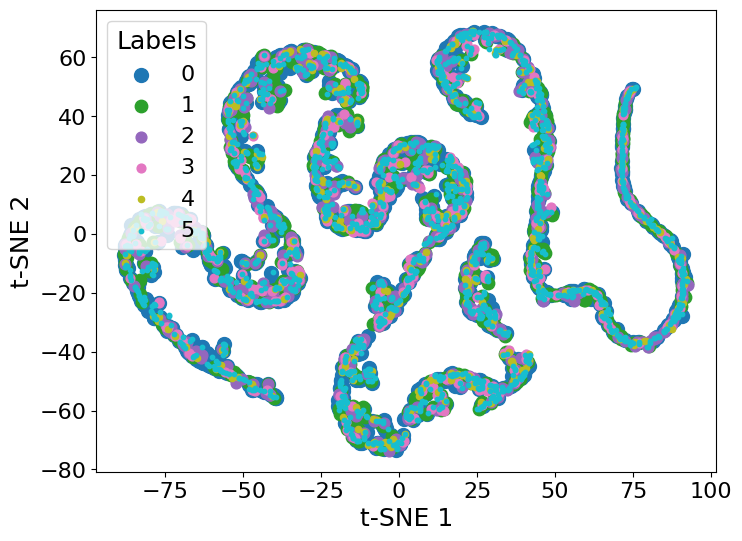

In [38]:
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['label'] = df['memory_usage_label']

# Remove NaNs
# tsne_df = tsne_df.dropna(subset=['label'])

fixed_sizes = [100, 80, 60, 40, 20, 10]

# Assign each label a size in a cyclic manner
cluster_sizes = {label: fixed_sizes[i % len(fixed_sizes)] for i, label in enumerate(unique_labels)}

# Plot the results
plt.figure(figsize=(8, 6))
for label in unique_labels:
    subset = tsne_df[tsne_df['label'] == label]
    plt.scatter(subset['tsne1'], subset['tsne2'], color=label_color_map[label], label=label, s=cluster_sizes[label])

# Labels and legend
plt.xlabel('t-SNE 1', fontsize=18)
plt.ylabel('t-SNE 2', fontsize=18)

plt.xticks(fontsize=16)  # Change X-axis number font size
plt.yticks(fontsize=16)  # Change Y-axis number font size

plt.legend(fontsize=16, title="Labels", title_fontsize=18, loc="best")  # Sorted legend

# plt.savefig("MLP_tsne.pdf")

<ipython-input-46-a259b767bf8b>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors


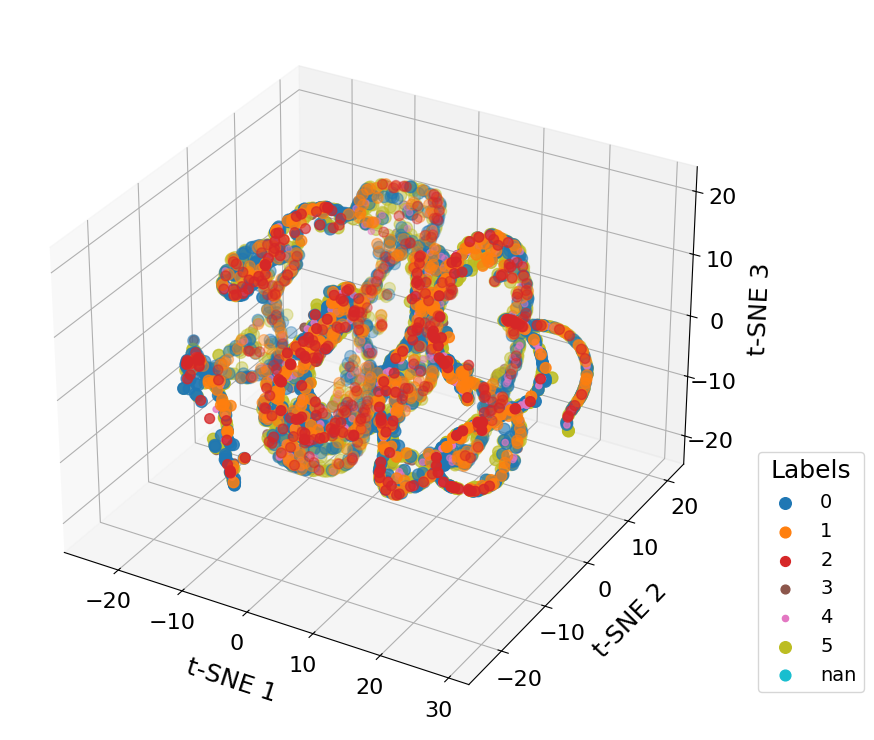

In [46]:
X = df[['Depth', 'Activation Function', 'Total Activations', 'Total_Activations_Batch_Size', 'Total Parameters', 'Batch Size',
               'Conv2d Count','BatchNorm2d Count', 'Dropout Count', 'AdaptiveAvgPool2d Count', 'Linear Count', 'activation_encoding_sin','activation_encoding_cos']]
y = df['memory_usage_label']

# Initialize the t-SNE model with 3 components
tsne = TSNE(n_components=3, random_state=43)

# Fit and transform the features
tsne_results = tsne.fit_transform(df[['Depth', 'Total Activations', 'Total_Activations_Batch_Size', 'Total Parameters', 'Batch Size',
                        'Conv2d Count', 'BatchNorm2d Count', 'Dropout Count', 'activation_encoding_sin','activation_encoding_cos'
                        ]])


# --- Prepare DataFrame ---
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])
tsne_df['label'] = y

# --- Visual Styling ---
unique_labels = sorted(tsne_df['label'].unique())
colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors
label_color_map = {label: colors[i] for i, label in enumerate(unique_labels)}
fixed_sizes = [100, 80, 60, 40, 20, 10]
cluster_sizes = {label: fixed_sizes[i % len(fixed_sizes)] for i, label in enumerate(unique_labels)}

# --- Plot ---
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:
    subset = tsne_df[tsne_df['label'] == label]
    ax.scatter(subset['tsne1'], subset['tsne2'], subset['tsne3'],
               color=label_color_map[label],
               label=str(label),
               s=cluster_sizes[label])

# Axis labels
ax.set_xlabel('t-SNE 1', fontsize=18, labelpad=12)
ax.set_ylabel('t-SNE 2', fontsize=18, labelpad=12)
ax.set_zlabel('t-SNE 3', fontsize=18, labelpad=10)

# Tick font sizes
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='z', labelsize=16)

# Legend styling
ax.legend(title="Labels", fontsize=14, title_fontsize=18, loc='upper right', bbox_to_anchor=(1.2, 0.4))

# Layout adjustment
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)

# Export or display
# plt.savefig("CNN_tsne_3d.pdf")
plt.show()

<ipython-input-40-4f08fa9bbf32>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors  # Get fixed colors


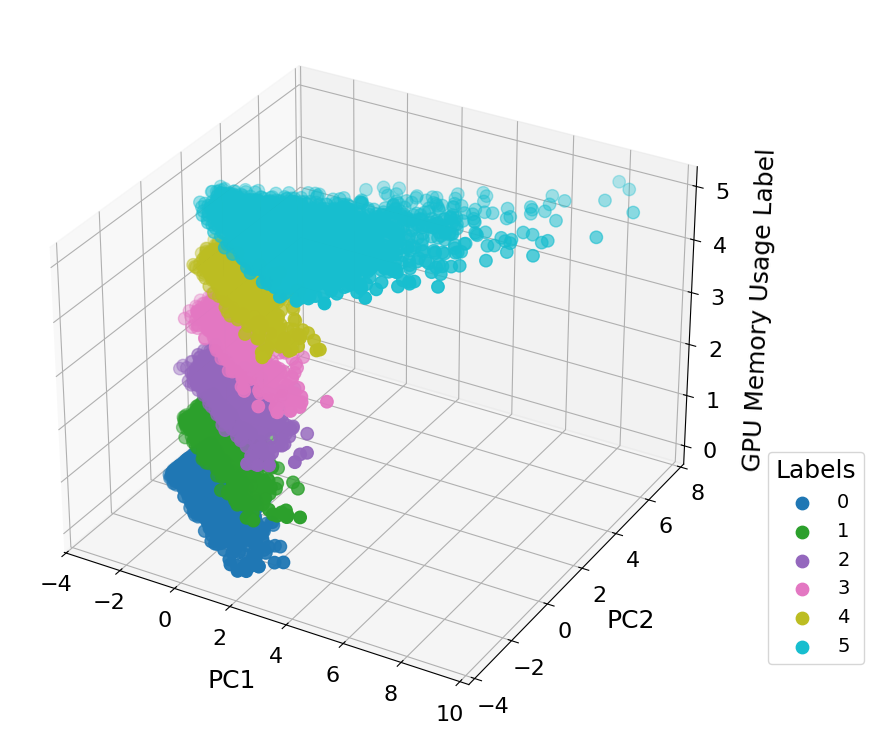

In [40]:
import matplotlib.ticker as ticker
from sklearn.decomposition import PCA

X = df[['Depth', 'Total Activations', 'Total_Activations_Batch_Size', 'Total Parameters', 'Batch Size',
        'Conv2d Count', 'BatchNorm2d Count', 'Dropout Count', 'activation_encoding_sin', 'activation_encoding_cos',
        # 'Input Size (MB)', 'Forward/Backward Pass Size (MB)', 'Params Size (MB)', 'Estimated Total Size (MB)'
        ]]

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)



# Apply PCA
pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)
X_pca = pca.fit_transform(X_normalized)


# Extract PCA components
pca1, pca2 = X_pca[:, 0], X_pca[:, 1]

# Ensure Z-axis starts with an even number and has exactly 4 steps
y_min, y_max = int(np.min(y)), int(np.max(y))
y_min = y_min + (y_min % 2)  # Ensure even start

# Generate exactly 4 even integer steps for Z-axis
int_ticks = np.linspace(start=y_min, stop=y_max, num=6, dtype=int)
int_ticks = np.unique(int_ticks)  # Avoid duplicate ticks

# Create figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Assign colors consistently
unique_labels = sorted(np.unique(y))
colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors  # Get fixed colors
label_color_map = {label: colors[i] for i, label in enumerate(unique_labels)}

# Plot each cluster with a fixed color (ONLY on Z-axis)
for label in unique_labels:
    mask = y == label
    ax.scatter(pca1[mask], pca2[mask], y[mask], color=label_color_map[label], label=str(label), s=80)

# Set labels and title
ax.set_xlabel(f'PC1', fontsize=18, labelpad=12)
ax.set_ylabel(f'PC2', fontsize=18, labelpad=12)
ax.set_zlabel('GPU Memory Usage Label', fontsize=18, labelpad=10)

# Increase tick label size (X, Y, and Z axis numbers)
ax.tick_params(axis='x', labelsize=16)  # Change X-axis number font size
ax.tick_params(axis='y', labelsize=16)  # Change Y-axis number font size
ax.tick_params(axis='z', labelsize=16)  # Change Z-axis number font size

# Set only 4 even numbers on the Z-axis
ax.set_zticks(int_ticks)
ax.zaxis.set_major_locator(ticker.FixedLocator(int_ticks))  # Ensure only these ticks appear

# Adjust legend position
ax.legend(title="Labels", fontsize=14, loc='upper right', title_fontsize=18, bbox_to_anchor=(1.2, 0.4))

plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)  # Adjust layout

# plt.savefig("CNN_pca3.pdf")

<ipython-input-43-00def6626590>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors


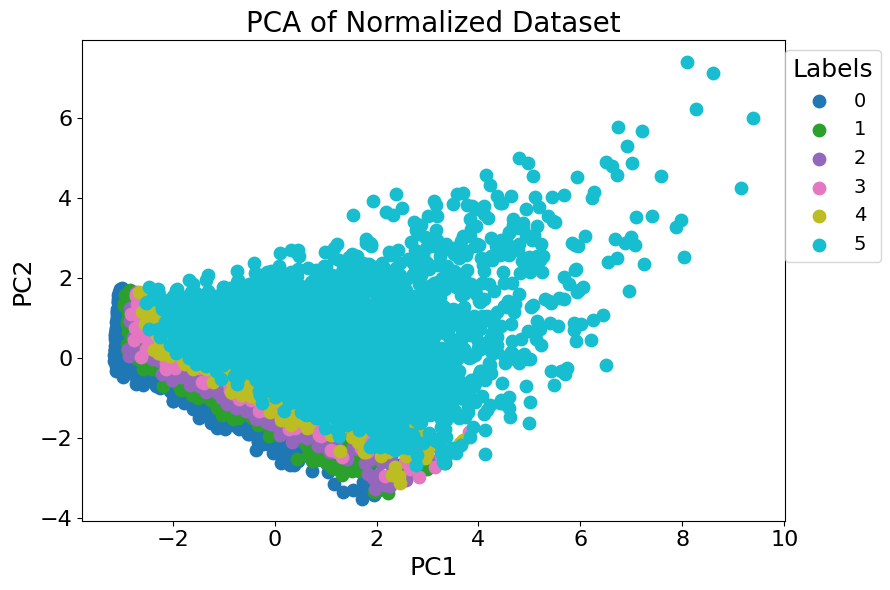

In [43]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
pca1, pca2 = X_pca[:, 0], X_pca[:, 1]

# Unique labels and consistent color mapping
unique_labels = sorted(np.unique(y))
colors = plt.cm.get_cmap("tab10", len(unique_labels)).colors
label_color_map = {label: colors[i] for i, label in enumerate(unique_labels)}

# Create figure
plt.figure(figsize=(9, 6))

# Plot each label with fixed color
for label in unique_labels:
    mask = y == label
    plt.scatter(pca1[mask], pca2[mask], color=label_color_map[label], label=str(label), s=80)

# Set labels and title
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
plt.title('PCA of Normalized Dataset', fontsize=20)

# Axis ticks styling
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Legend styling
plt.legend(title="Labels", fontsize=14, title_fontsize=18, loc='upper right', bbox_to_anchor=(1.15, 1))

# Adjust layout and save
plt.tight_layout()
plt.show()